In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

The function that we used to generate the data is y = 4 + 3x1 + GaussianNoise

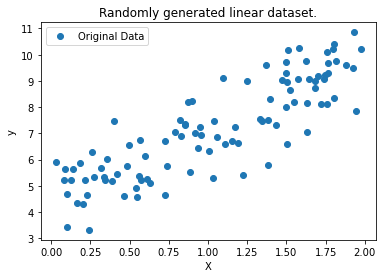

In [3]:
plt.plot(X, y, 'o', label = 'Original Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Randomly generated linear dataset.');

We will now compute the Cost Function using Normal Equation. We will use the inv() function from numpy's linear algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication.

In [4]:
X_b = np.c_[np.ones((100, 1)), X] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.42983077],
       [2.66489438]])

This is quite close to the parameters we started with i.e. 4 and 3. We can make prediction using theta_best

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

In [7]:
y_predict

array([[4.42983077],
       [9.75961954]])

In [8]:
X_new

array([[0],
       [2]])

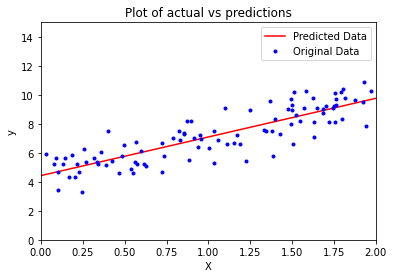

In [9]:
plt.plot(X_new, y_predict, 'r-', label = 'Predicted Data')
plt.plot(X, y, 'b.', label = 'Original Data')
plt.axis([0, 2, 0, 15]);
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Plot of actual vs predictions');

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [12]:
lin_reg.intercept_, lin_reg.coef_

(array([4.42983077]), array([[2.66489438]]))

In [13]:
lin_reg.predict(X_new)

array([[4.42983077],
       [9.75961954]])

In [14]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [15]:
theta_best_svd

array([[4.42983077],
       [2.66489438]])

In [16]:
residuals

array([90.2429284])

In [17]:
rank

2

In [18]:
s

array([15.01755616,  3.88421903])

In [19]:
np.linalg.pinv(X_b).dot(y)

array([[4.42983077],
       [2.66489438]])

Batch Gradient Descent

In [20]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1)

In [21]:
theta

array([[1.92342011],
       [1.22276713]])

In [22]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [23]:
theta

array([[4.42983077],
       [2.66489438]])

Stochastic Gradient Descent

In [24]:
n_epochs = 50
t0, t1 = 5, 50

In [25]:
def learning_schedule(t):
    return t0 / (t + t1)

In [26]:
theta = np.random.rand(2, 1)
theta

array([[0.18450611],
       [0.37226352]])

In [27]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [28]:
theta

array([[4.43481118],
       [2.68395234]])

Stochastic Gradient Descent using Scikit Learn

In [29]:
from sklearn.linear_model import SGDRegressor

In [30]:
sgd_reg = SGDRegressor(max_iter=1000, tol = 1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [31]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.41630738]), array([2.67429843]))

In [32]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

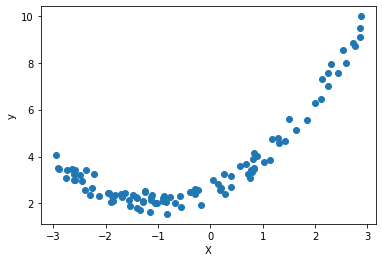

In [33]:
plt.plot(X, y, 'o')
plt.xlabel("X")
plt.ylabel("y")
plt.show();

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [36]:
X[0]

array([-2.25772724])

In [37]:
X_poly[0]

array([-2.25772724,  5.09733228])

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [39]:
lin_reg.intercept_, lin_reg.coef_

(array([2.55847861]), array([[0.99790316, 0.47880588]]))

In [40]:
predictions = lin_reg.predict(X_poly)

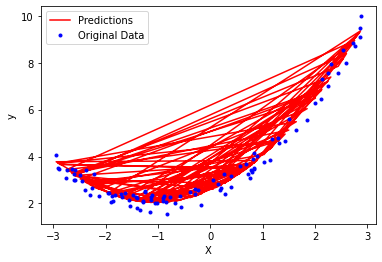

In [41]:
plt.plot(X, predictions, 'r-', label = 'Predictions')
plt.plot(X, y, 'b.', label = 'Original Data')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show();

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [43]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

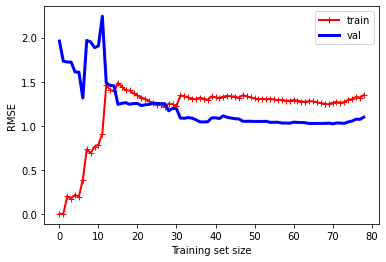

In [44]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [45]:
from sklearn.pipeline import Pipeline

In [46]:
polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree = 10, include_bias=False)), 
                                 ("lin_reg", LinearRegression())])

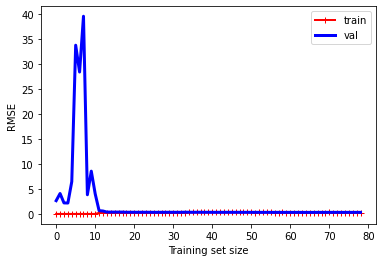

In [47]:
plot_learning_curves(polynomial_regression, X, y)

In [48]:
from sklearn.linear_model import Ridge

In [49]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [50]:
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.30620079]])

In [51]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.28324069])

In [52]:
from sklearn.linear_model import Lasso

In [53]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.24651344])

In [54]:
from sklearn.linear_model import ElasticNet

In [55]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.25037936])

In [56]:
from copy import deepcopy

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree = 90, include_bias = False)), 
                       ("std_scaler", StandardScaler())])

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [60]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)
sgd_reg = SGDRegressor(max_iter = 1, tol = -np.infty, warm_start = True, 
                      penalty = None, learning_rate="constant", eta0=0.005)

In [61]:
minimum_val_error = float("inf")
bost_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\U

In [62]:
best_epoch

0

In [63]:
from sklearn import datasets

In [64]:
iris = datasets.load_iris()

In [65]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [66]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
log_reg = LogisticRegression()

In [69]:
log_reg.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Probability')

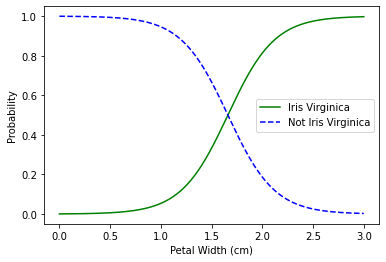

In [71]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label = "Iris Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris Virginica")
plt.legend()
plt.xlabel("Petal Width (cm)")
plt.ylabel("Probability")

In [73]:
log_reg.predict([[1.7], [1.6], [1.5]])

array([1, 0, 0])

In [74]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

In [75]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C = 10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [76]:
softmax_reg.predict([[5, 2]])

array([2])

In [77]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])